In [12]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
#import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline




In [13]:
daily_Data = pd.read_csv("/home/ayush/Documents/machine learning/bike-sharing-demand/train.csv")
daily_Data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
daily_Data.shape

(10886, 12)

In [15]:
daily_Data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [16]:
daily_Data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [17]:
daily_Data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [18]:
print('season:',daily_Data.season.unique())
print("holiday",daily_Data.holiday.unique())
print('workingday:',daily_Data.workingday.unique())
print('weather:',daily_Data.weather.unique())
print('temp:',daily_Data.temp.unique())
print('atemp:',daily_Data.atemp.unique())
print('humidity:',daily_Data.humidity.unique())

season: [1 2 3 4]
holiday [0 1]
workingday: [0 1]
weather: [1 2 3 4]
temp: [  9.84   9.02   8.2   13.12  15.58  14.76  17.22  18.86  18.04  16.4
  13.94  12.3   10.66   6.56   5.74   7.38   4.92  11.48   4.1    3.28
   2.46  21.32  22.96  23.78  24.6   19.68  22.14  20.5   27.06  26.24
  25.42  27.88  28.7   30.34  31.16  29.52  33.62  35.26  36.9   32.8
  31.98  34.44  36.08  37.72  38.54   1.64   0.82  39.36  41.  ]
atemp: [ 14.395  13.635  12.88   17.425  19.695  16.665  21.21   22.725  21.97
  20.455  11.365  10.605   9.85    8.335   6.82    5.305   6.06    9.09
  12.12    7.575  15.91    3.03    3.79    4.545  15.15   18.18   25.
  26.515  27.275  29.545  23.485  25.76   31.06   30.305  24.24   18.94
  31.82   32.575  33.335  28.79   34.85   35.605  37.12   40.15   41.665
  40.91   39.395  34.09   28.03   36.365  37.88   42.425  43.94   38.635
   1.515   0.76    2.275  43.18   44.695  45.455]
humidity: [ 81  80  75  86  76  77  72  82  88  87  94 100  71  66  57  46  42  39
  44  

In [19]:
from collections import Counter
Counter(daily_Data["holiday"])

Counter({0: 10575, 1: 311})

In [20]:
#Data visualization

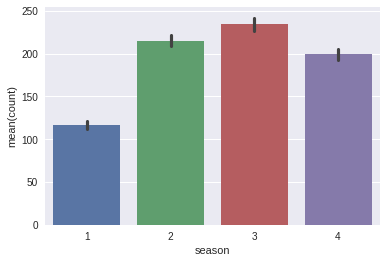

In [21]:
sn.barplot(x='season', y='count', data=daily_Data)

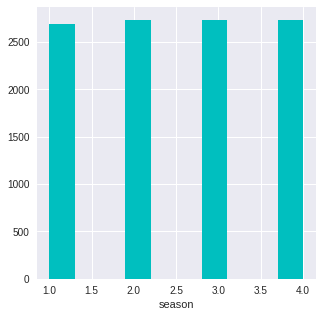

In [22]:
f, ax = plt.subplots(figsize=(5,5))
plt.hist(x="season", data=daily_Data, color="c");
plt.xlabel("season")

In [23]:
daily_Data.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

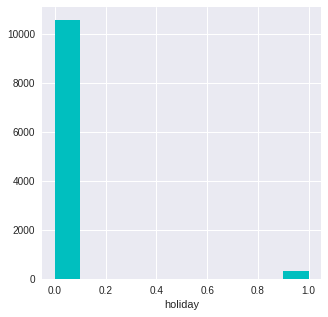

In [24]:
f, ax = plt.subplots(figsize=(5,5))
plt.hist(x="holiday", data=daily_Data,color='c');
plt.xlabel("holiday")

In [25]:
daily_Data.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

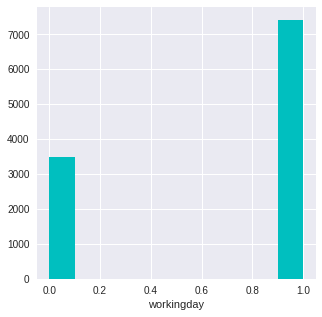

In [26]:
f, ax = plt.subplots(figsize=(5,5))
plt.hist(x="workingday",data=daily_Data,color='c');
plt.xlabel("workingday")

In [27]:
daily_Data.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

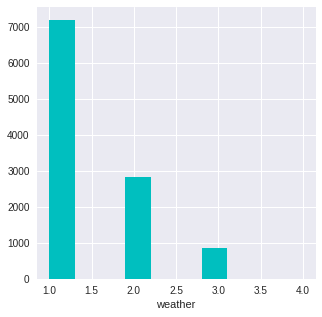

In [28]:
f, ax = plt.subplots(figsize=(5,5))
plt.hist(x="weather",data=daily_Data,color='c');
plt.xlabel("weather")

In [29]:
daily_Data.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

(array([   69.,   648.,  1440.,  1891.,  1587.,  1753.,  1901.,  1194.,
          355.,    48.]),
 array([  0.82 ,   4.838,   8.856,  12.874,  16.892,  20.91 ,  24.928,
         28.946,  32.964,  36.982,  41.   ]),
 <a list of 10 Patch objects>)

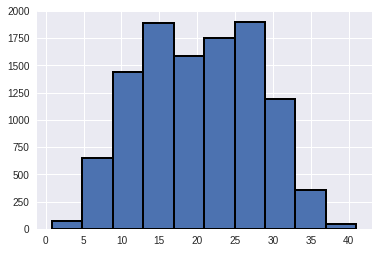

In [30]:
plt.hist(x="temp",data=daily_Data,edgecolor="black",linewidth=2)

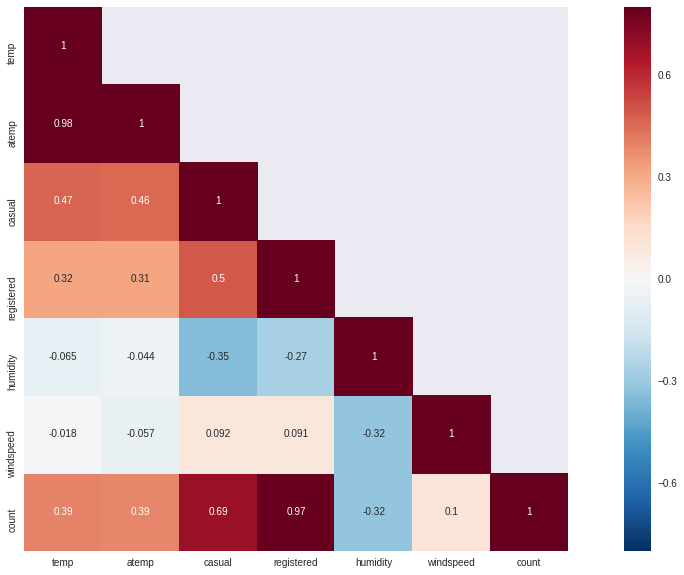

In [31]:
#correlation
corrMatt = daily_Data[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [32]:
season=pd.get_dummies(daily_Data['season'])
daily_Data=pd.concat([daily_Data,season],axis=1)

In [33]:
weather=pd.get_dummies(daily_Data['weather'])
daily_Data=pd.concat([daily_Data,weather],axis=1)

In [34]:
daily_Data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,1,2,3,4,1,2,3,4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


In [35]:
daily_Data.shape

(10886, 20)

In [36]:
daily_Data=daily_Data.drop("season",axis=1)
daily_Data=daily_Data.drop("weather",axis=1)
daily_Data=daily_Data.drop("casual",axis=1)
daily_Data=daily_Data.drop("registered",axis=1)
labels=daily_Data.pop("count")

In [37]:
daily_Data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,1,2,3,4,1,2,3,4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,1,0,0,0,1,0,0,0


In [38]:
daily_Data.shape

(10886, 15)

In [39]:
labels.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [40]:
daily_Data["hour"] = [t.hour for t in pd.DatetimeIndex(daily_Data.datetime)]
daily_Data["day"] = [t.dayofweek for t in pd.DatetimeIndex(daily_Data.datetime)]
daily_Data["month"] = [t.month for t in pd.DatetimeIndex(daily_Data.datetime)]
daily_Data['year'] = [t.year for t in pd.DatetimeIndex(daily_Data.datetime)]
daily_Data['year'] = daily_Data['year'].map({2011:0, 2012:1})

In [41]:
daily_Data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,1,2,3,4,1,2,3,4,hour,day,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,1,0,0,0,1,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,1,0,0,0,1,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,1,0,0,0,1,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,1,0,0,0,1,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,1,0,0,0,1,0,0,0,4,5,1,0


In [42]:
print("holiday",daily_Data.holiday.unique())
print('workingday:',daily_Data.workingday.unique())
print('temp:',daily_Data.temp.unique())
print('atemp:',daily_Data.atemp.unique())
print('hour:',daily_Data.hour.unique())
print('day:',daily_Data.day.unique())
print('month:',daily_Data.month.unique())
print('year:',daily_Data.year.unique())

holiday [0 1]
workingday: [0 1]
temp: [  9.84   9.02   8.2   13.12  15.58  14.76  17.22  18.86  18.04  16.4
  13.94  12.3   10.66   6.56   5.74   7.38   4.92  11.48   4.1    3.28
   2.46  21.32  22.96  23.78  24.6   19.68  22.14  20.5   27.06  26.24
  25.42  27.88  28.7   30.34  31.16  29.52  33.62  35.26  36.9   32.8
  31.98  34.44  36.08  37.72  38.54   1.64   0.82  39.36  41.  ]
atemp: [ 14.395  13.635  12.88   17.425  19.695  16.665  21.21   22.725  21.97
  20.455  11.365  10.605   9.85    8.335   6.82    5.305   6.06    9.09
  12.12    7.575  15.91    3.03    3.79    4.545  15.15   18.18   25.
  26.515  27.275  29.545  23.485  25.76   31.06   30.305  24.24   18.94
  31.82   32.575  33.335  28.79   34.85   35.605  37.12   40.15   41.665
  40.91   39.395  34.09   28.03   36.365  37.88   42.425  43.94   38.635
   1.515   0.76    2.275  43.18   44.695  45.455]
hour: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
day: [5 6 0 1 2 3 4]
month: [ 1  2  3  4  5  6

In [43]:
daily_Data=daily_Data.drop("datetime",axis=1)

In [44]:
daily_Data.columns

Index([   'holiday', 'workingday',       'temp',      'atemp',   'humidity',
        'windspeed',            1,            2,            3,            4,
                  1,            2,            3,            4,       'hour',
              'day',      'month',       'year'],
      dtype='object')

In [45]:
from sklearn.cross_validation import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(daily_Data, labels, test_size=.3, random_state=42)

In [46]:
X_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,1,2,3,4,1,2,3,4,hour,day,month,year
613,0,1,9.02,9.090,32,39.0007,1,0,0,0,1,0,0,0,17,1,2,0
4030,0,0,22.14,25.760,68,12.9980,0,0,1,0,1,0,0,0,23,6,9,0
3582,0,1,26.24,28.790,83,0.0000,0,0,1,0,1,0,0,0,4,4,8,0
10101,0,1,9.02,11.365,69,8.9981,0,0,0,1,1,0,0,0,6,1,11,1
1430,0,1,13.12,14.395,81,30.0026,0,1,0,0,0,0,1,0,11,1,4,0


In [55]:
#from sklearn.ensemble import RandomForestRegressor
#forest = RandomForestRegressor(n_estimators = 400, criterion='mse',random_state=1, n_jobs=-1)
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 400, criterion='mse',random_state=1, n_jobs=-1)
reg=reg.fit(X_train, y_train)
feat=(reg.feature_importances_)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print(feat)


[  2.04815671e-03   5.92187913e-02   3.66368002e-02   6.77525422e-02
   2.68805828e-02   9.35654104e-03   1.32374665e-02   1.18198000e-03
   9.78810214e-04   9.30195708e-04   1.96472937e-03   1.10211649e-03
   1.13435590e-02   2.85055594e-07   5.90221911e-01   4.56667005e-02
   4.70633454e-02   8.44154860e-02]


(array([ 10.,   2.,   2.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  2.85055594e-07,   1.96743393e-02,   3.93483935e-02,
          5.90224477e-02,   7.86965019e-02,   9.83705561e-02,
          1.18044610e-01,   1.37718665e-01,   1.57392719e-01,
          1.77066773e-01,   1.96740827e-01,   2.16414881e-01,
          2.36088936e-01,   2.55762990e-01,   2.75437044e-01,
          2.95111098e-01,   3.14785152e-01,   3.34459207e-01,
          3.54133261e-01,   3.73807315e-01,   3.93481369e-01,
          4.13155423e-01,   4.32829478e-01,   4.52503532e-01,
          4.72177586e-01,   4.91851640e-01,   5.11525695e-01,
          5.31199749e-01,   5.50873803e-01,   5.70547857e-01,
          5.90221911e-01]),
 <a list of 30 Patch objects>)

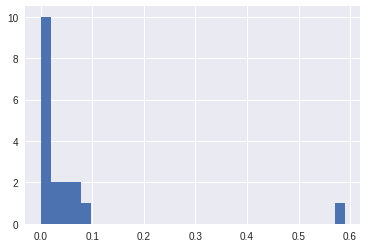

In [56]:
plt.hist(feat,bins=30)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
#Root_Mean_Square_Log_Error(RMSE) is accuracy criteria for this problem
print('RMSLE train: %.3f' % np.sqrt(mean_squared_error(np.log(y_train + 1), np.log(y_train_pred + 1))))
print('RMSLE test: %.3f' % np.sqrt(mean_squared_error(np.log(y_test + 1), np.log(y_test_pred + 1))))
print('R2 train: %.3f' % r2_score(y_train, y_train_pred))
print('R2 test: %.3f' % r2_score(y_test, y_test_pred))

RMSLE train: 0.150
RMSLE test: 0.331
R2 train: 0.993
R2 test: 0.951
